<a href="https://colab.research.google.com/github/Msftiskay/KNN-Algorithm/blob/main/KNN_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits =load_digits()

In [4]:
type(digits)

sklearn.utils._bunch.Bunch

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits.target[9]

9

In [7]:
digits.target[::4]

array([0, 4, 8, 2, 6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2,
       6, 9, 8, 4, 6, 7, 7, 2, 5, 4, 9, 2, 6, 0, 4, 8, 2, 6, 0, 6, 8, 1,
       5, 2, 2, 6, 3, 6, 1, 5, 0, 6, 7, 9, 8, 4, 6, 7, 7, 2, 8, 0, 0, 4,
       8, 2, 6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2, 6, 9,
       8, 4, 6, 7, 7, 2, 5, 4, 9, 2, 6, 0, 4, 8, 2, 6, 0, 6, 8, 1, 5, 2,
       2, 6, 3, 6, 1, 5, 0, 6, 7, 1, 7, 3, 5, 6, 4, 8, 7, 8, 0, 0, 4, 8,
       2, 6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2, 6, 9, 8,
       4, 6, 7, 7, 2, 5, 4, 9, 2, 6, 0, 4, 8, 2, 6, 0, 6, 8, 1, 5, 2, 2,
       6, 3, 6, 1, 5, 0, 6, 7, 1, 7, 3, 5, 6, 4, 8, 7, 8, 0, 0, 4, 8, 2,
       6, 0, 4, 8, 5, 0, 8, 7, 0, 7, 1, 3, 4, 4, 0, 8, 1, 2, 6, 9, 8, 4,
       6, 7, 7, 2, 5, 4, 9, 3, 7, 1, 5, 9, 3, 7, 9, 5, 9, 7, 1, 2, 6, 3,
       6, 1, 5, 0, 6, 4, 3, 6, 1, 3, 1, 4, 2, 9, 9, 8, 3, 7, 1, 5, 9, 3,
       7, 9, 5, 9, 7, 1, 8, 2, 7, 6, 9, 9, 2, 7, 1, 3, 1, 4, 0, 9, 5, 2,
       5, 4, 9, 8, 3, 7, 1, 5, 9, 3, 7, 9, 5, 9, 7,

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

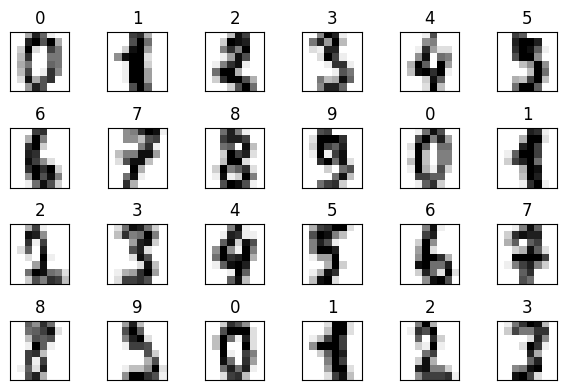

In [10]:
import matplotlib.pyplot as plt

figure, axes =plt.subplots(nrows=4, ncols=6, figsize=(6,4))

for item in zip (axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [13]:
digits.data.shape

(1797, 64)

In [14]:
X_train.shape

(1347, 64)

In [15]:
y_train.shape

(1347,)

In [16]:
X_test.shape

(450, 64)

In [17]:
1347/1797*100

74.95826377295492

In [18]:
#creating the model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier()

In [21]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [22]:
#prediction

In [23]:
predicated = knn.predict(X=X_test)

In [24]:
expected = y_test

In [25]:
expected

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

In [26]:
predicated

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 8, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 4, 7, 2, 0, 3, 7, 8, 8, 7, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 7, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 2, 5, 3,

In [27]:
wrong=[(p,e) for (p,e) in zip(predicated, expected) if p != e]

In [28]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [29]:
len(wrong)

10

In [30]:
440/450*100

97.77777777777777

In [31]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion = confusion_matrix(y_true = expected, y_pred = predicated)

In [34]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

In [37]:
#Visualizing the confusion matrix using the heat map

In [38]:
type(confusion)

numpy.ndarray

In [39]:
import pandas as pd

In [42]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [35]:
import seaborn as sns

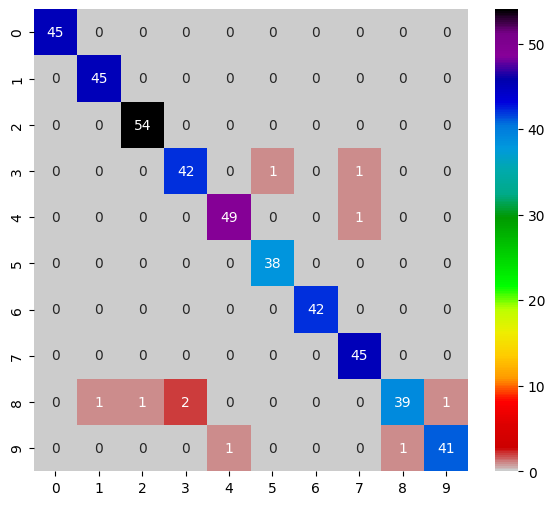

In [43]:
figure=plt.figure(figsize=(7,6))
axes=sns.heatmap(confusion_df, annot=True, cmap=plt.cm.nipy_spectral_r)